![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for MARRMoT models using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
from datetime import datetime

import pandas as pd
from rich import print
from scipy.io import loadmat

import ewatercycle.forcing

In [3]:
forcing = ewatercycle.forcing.sources["MarrmotForcing"].generate(
    dataset="ERA5",
    start_time="1989-01-01T00:00:00Z",
    end_time="1992-12-31T00:00:00Z",
    shape="data/Rhine/Rhine.shp",
)
print(forcing)

MarrmotForcing(
    model='marrmot',
    start_time='1989-01-01T00:00:00Z',
    end_time='1992-12-31T00:00:00Z',
    directory=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/marrmot/esmvaltool_output/tmp6yr9x2
jrrecipe_marrmot_20230731_113703/work/diagnostic_daily/script'),
    shape=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/marrmot/esmvaltool_output/tmp6yr9x2jrre
cipe_marrmot_20230731_113703/work/diagnostic_daily/script/data/Rhine/Rhine.shp'),
    forcing_file='marrmot_ERA5_Rhine_1989_1992.mat'
)

### Plot forcing

In [6]:
from ewatercycle.plugins.marrmot.forcing import load_forcing_file

In [7]:
fn = forcing.directory / forcing.forcing_file
fn

PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/marrmot/esmvaltool_output/tmp6yr9x2jrrecipe_marrmot_20230731_113703/work/diagnostic_daily/script/marrmot_ERA5_Rhine_1989_1992.mat')

In [8]:
df = load_forcing_file(fn)

<AxesSubplot:xlabel='time'>

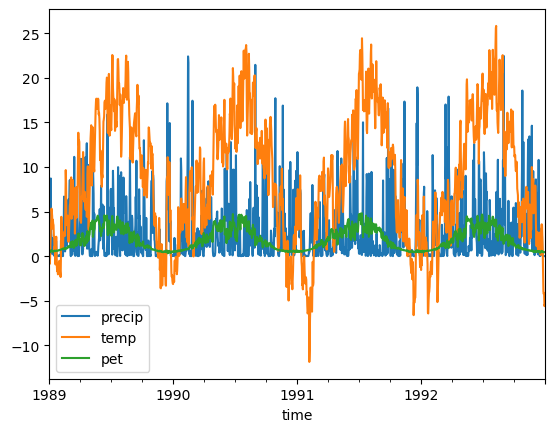

In [15]:
df.plot()